In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Random classes and train-test split simulation

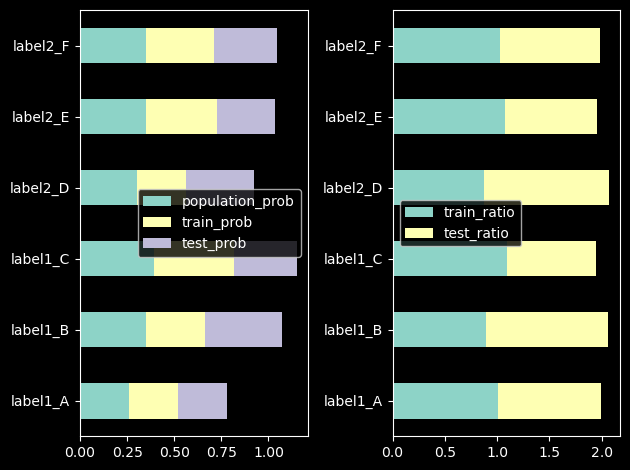

In [7]:
n = 100
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# plt.ion()
for i in range(100):
    rng = np.random.RandomState()
    df = pd.DataFrame({'label1':rng.choice(['A','B','C'], n),
                       'label2':rng.choice(['D', 'E', 'F'], n)}, dtype='category')
    y=pd.get_dummies(df)
    indices = rng.choice(y.index, size=np.floor(y.shape[0]/2).astype('int'))
    test_mask = y.index.isin(indices)
    test = y[test_mask]
    train = y[~test_mask]
    mle = pd.concat({'population_prob':y.mean(), 'train_prob':train.mean(), 'test_prob':test.mean()}, axis=1)
    ratios=pd.DataFrame()
    ratios['train_ratio'] = mle.train_prob / mle.population_prob
    ratios['test_ratio'] = mle.test_prob / mle.population_prob
    ax1.clear()
    ax2.clear()
    mle.plot(kind='barh', stacked=True, ax=ax1)
    ratios.plot(kind='barh', stacked=True, ax=ax2)
    ax1.legend(loc='center right')
    ax2.legend(loc='center left')
    plt.tight_layout()
    fig.canvas.draw()
# plt.ioff()